# **Project Name**    - **Play Store App Review Analysis**



##### **Project Type**    - EDA (Exploratory data Analysis)
##### **Contribution**    - Individual
##### **Submitter**       - Sanket Vijay Tandulkar

# **Problem Statement**



BUSINESS PROBLEM OVERVIEW

With so many apps on the Play Store , user reviews have become one of the key factors that determine how successful an app can be. Reviews not only affect download decisions but also reveal what users like, dislike, or except from an app. However, since this reviews are vast in number and mostly unstructured, it is difficult for developers and business to go through them manually and extract useful insights.

This project focuses on performing exploratory data analysis (EDA) on Play  Store app reviews dataset to find meaningful patterns and trends. By studying aspects like user ratings, sentiment, reviews, app categories, and more, the analysis aims to understand what influences user satisfaction and overall app performance.

The finding from this project can also help developers and product teams make better decisions - such as improving app features, fixing common issues, and enhancing user experience - to ultimately boost app ratings and retetion on play store.

#### **Define Your Business Objective?**

**Improving App Quality and Customer Satisfaction**

# **GitHub Link**

GitHub Link -- https://github.com/Standulkar/PlayStore_Review_EDA_capstone_project

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries numpy, pandas, seaborn and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Play Store Dataset  -- Dataset 1

# We have saved dataset on our google drive > Copied link (public link access) > and then converted it to direct download link > then used in google collab to load dataset.

# This will make it easier for evaluator to directly run the notebook without connecting to mount drive or dataset file not found error.

url1 = 'https://drive.google.com/uc?export=download&id=1HDJsJ45xRQmcU1puphBrRdxDnmDsu74H'
df = pd.read_csv(url1)


# Load User Reviews Dataset -- Dataset 2
url2 = 'https://drive.google.com/uc?export=download&id=12FVT_dG2VKsUEVAeldw_5YnJ79Gt_sZk'
ur = pd.read_csv(url2)


**We will clean both datasets individually before merging them to ensure a high-quality and consistent final dataset.**

### Dataset First View

In [3]:
# Dataset 1 -- Play Store Dataset, First Look -- starting 5 rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Dataset 2 -- User Reviews Dataset, First Look -- starting 5 rows
ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [5]:
# Dataset 1 -- Rows & Columns count (Play Store Dataset)

df.shape

(10841, 13)

In [6]:
# Dataset 2 -- Rows & Columns count (User reviews Dataset)

ur.shape

(64295, 5)

### Dataset Information

In [7]:
# Play Store Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# User Reviews dataset Info

ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [9]:
# Play store Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(483)

In [10]:
# User reviews Dataset Duplicate Value Count
ur.duplicated().sum()

np.int64(33616)

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count -- Play store dataset

df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


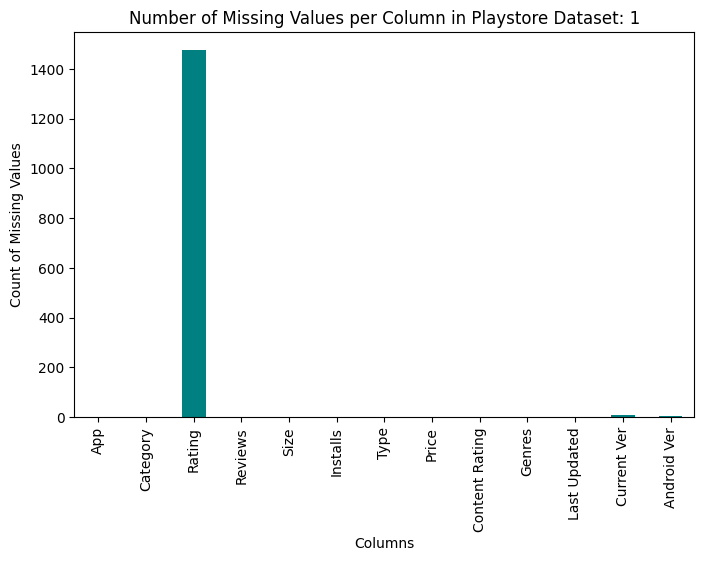

In [12]:
# Visualizing the missing values
df.isnull().sum().plot(kind='bar', figsize=(8,5), color='teal')
plt.title("Number of Missing Values per Column in Playstore Dataset: 1")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.show()

As seen in the above bar plot, the Rating column contains the highest number of missing values in the dataset. Total - 1487 Null Values

In [13]:
# Missing Values/Null Values Count -- user Reviews dataset

ur.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


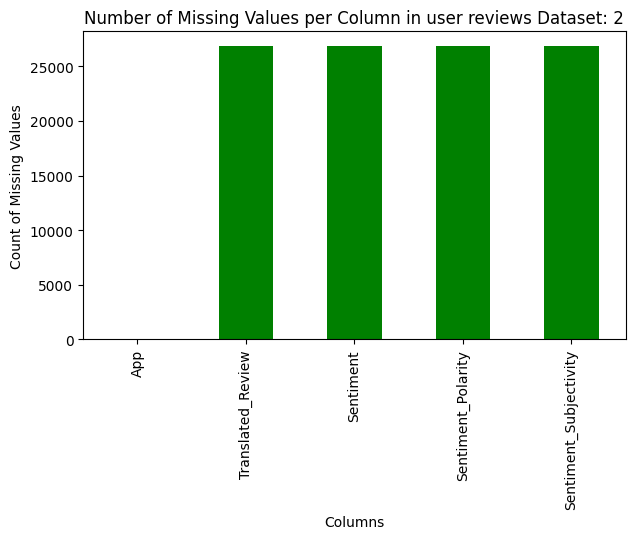

In [14]:
# Visualizing the missing values
ur.isnull().sum().plot(kind='bar', figsize=(7,4), color='green')
plt.title("Number of Missing Values per Column in user reviews Dataset: 2")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.show()

As observed from the above visualization, in the User Reviews dataset, the App column contains no missing values, whereas all the other columns have a significant number of null values — exceeding 25,000 in each.

### What did you know about your dataset?

**We are working with two datasets for this EDA project:**

**1. Play Store Dataset --**
This dataset contains information about various apps on the Google Play Store, with columns such as App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, and Android Ver.
It consists of 10,841 rows and 13 columns, including 483 duplicate entries and a total of 1,487 missing values across multiple columns.


**2. User Reviews Dataset --**
This dataset includes user feedback and sentiment details for different apps. It contains columns such as App, Translated_Review, Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity.
It consists of 64,295 rows and 5 columns, with 33,616 duplicate entries. Additionally, the Translated_Review column has 26,868 missing values, while the Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity columns each have 26,863 missing values.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
# 1. Play Store dataset Columns

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [16]:
# Dataset Columns

# 2. User Reviews dataset Columns

ur.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [17]:
# Dataset Describe for Play Store Dataset

df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [18]:
# Dataset Describe for user reviews Dataset

ur.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description

1. Play Store Dataset

App -- The name of the mobile application available on the Google Play Store.

Category -- The category under which the app is listed, such as Education, Tools, or Entertainment.

Rating -- The average user rating of the app, usually on a scale of 1 to 5.

Reviews -- The total number of user reviews submitted for the app.

Size -- The storage size of the app (in MB or KB).

Installs -- The total number of times the app has been downloaded or installed.

Type -- Indicates whether the app is Free or Paid.

Price -- The price of the app in USD, with 0 indicating a free app.

Content Rating -- The recommended age group for app usage (e.g., Everyone, Teen, Mature 17+).

Genres -- The specific genre or subcategory of the app (e.g., Action, Productivity, Lifestyle).

Last Updated -- The date when the app was most recently updated on the Play Store.

Current Ver -- The current version of the app available for download.

Android Ver -- The minimum Android version required to install and run the app.


2. User Reviews Dataset

App	-- The name of the app that the review belongs to.

Translated_Review -- The user’s review text, translated into English for analysis.

Sentiment -- The overall sentiment of the review — Positive, Negative, or Neutral.

Sentiment_Polarity -- A numerical score representing how positive or negative the sentiment is (ranging from -1 to 1).

Sentiment_Subjectivity -- A numerical measure indicating how subjective or opinion-based the review is (ranging from 0 to 1).

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.

df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [20]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [21]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [22]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [23]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [24]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [25]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [26]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [27]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [28]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [29]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [30]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [31]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [32]:
ur['Translated_Review'].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis', nan, ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [33]:
ur['Sentiment_Subjectivity'].unique()

array([0.53333333, 0.28846154,        nan, ..., 0.51145833, 0.7172619 ,
       0.2594697 ])

In [34]:
ur['Sentiment_Polarity'].unique()

array([ 1.        ,  0.25      ,         nan, ..., -0.52857143,
       -0.37777778,  0.17333333])

In [35]:
ur['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [36]:
# Write your code to make your dataset analysis ready.
# First we will clean the dataset 1 and dataset 2, after that we will merge both the data in order to maintain consistency in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [37]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [38]:
# Handling duplicate values first
df.duplicated().sum()

np.int64(483)

In [39]:
#Removing Duplicated values
df.drop_duplicates(inplace=True)

In [40]:
df.isnull().mean()  # Chencing null values

,0
App,0.000000
Category,0.000000
Rating,0.141437
Reviews,0.000000
Size,0.000000
Installs,0.000000
Type,0.000097
Price,0.000000
Content Rating,0.000097
Genres,0.000000


Since Rating is critical for your insights and 14% isn’t extreme, we will Impute missing ratings using the category-wise mean.

This keeps our dataset balanced without discarding valuable apps.

In [41]:
# Imputing missing values in Rating Column

df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [43]:
# Checking row where value is missing in Type Column

df[df['Type'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.191153,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [44]:
# Only one value is missing so we are dropping this row

df = df.dropna(subset=['Type'])

In [45]:
# Same for CContent Rating column, one row consist of missing values, hence dropping the row

df = df.dropna(subset=['Content Rating'])

In [46]:
# Since the Current Ver column doesn’t add much analytical value and often contains inconsistent or messy version strings, we will drop it and keep our dataset clean

df.drop(columns=['Current Ver'], inplace=True)

In [47]:
# Dropping null rows from Android Ver Column
df = df.dropna(subset=['Android Ver'])

In [48]:
df.info() # Dataset is in better state now

<class 'pandas.core.frame.DataFrame'>
Index: 10354 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10354 non-null  object 
 1   Category        10354 non-null  object 
 2   Rating          10354 non-null  float64
 3   Reviews         10354 non-null  object 
 4   Size            10354 non-null  object 
 5   Installs        10354 non-null  object 
 6   Type            10354 non-null  object 
 7   Price           10354 non-null  object 
 8   Content Rating  10354 non-null  object 
 9   Genres          10354 non-null  object 
 10  Last Updated    10354 non-null  object 
 11  Android Ver     10354 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.0+ MB


In [49]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up


In [50]:
# Let's see inconsitencies, we will correct them, change data types of column as per need

# Changing Last Updated column Dtype from Object to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [51]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [52]:
# reducing or merging the number of unique values in the Content Rating column to simplify analysis.

df['Content Rating'] = df['Content Rating'].replace({
    'Everyone 10+': 'Everyone',
    'Mature 17+': 'Mature',
    'Adults only 18+': 'Mature',
    'Unrated': 'Everyone'
})

In [53]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature'], dtype=object)

In [54]:
# In Genres Column many rows contain multiple genres separated by semicolons (;) or ampersands (&). To resolve this we will standardize the column and will keep only first [0]th Genre.
# This helps you standardize the column for visualization or grouping:

df['Genres'] = df['Genres'].apply(lambda x: x.split(';')[0])

In [55]:
df['Genres'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [56]:
# Dropping android ver column as;

# 1. It’s mostly textual and inconsistent, like "Varies with device" or multiple ranges.
# 2. The number of unique values is too high and doesn’t add analytical value.

df.drop('Android Ver', axis=1, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10354 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10354 non-null  object        
 1   Category        10354 non-null  object        
 2   Rating          10354 non-null  float64       
 3   Reviews         10354 non-null  object        
 4   Size            10354 non-null  object        
 5   Installs        10354 non-null  object        
 6   Type            10354 non-null  object        
 7   Price           10354 non-null  object        
 8   Content Rating  10354 non-null  object        
 9   Genres          10354 non-null  object        
 10  Last Updated    10354 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 1.2+ MB


In [58]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,2018-06-20


In [59]:
# We will convert the dtype of Reviews column from object to Int (as reviews are always whole number)

# Checking if there are any comma and remove them
df['Reviews'] = df['Reviews'].replace(',', '', regex=True)

In [60]:
#Converting from object to int
df['Reviews'] = df['Reviews'].astype('int64')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10354 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10354 non-null  object        
 1   Category        10354 non-null  object        
 2   Rating          10354 non-null  float64       
 3   Reviews         10354 non-null  int64         
 4   Size            10354 non-null  object        
 5   Installs        10354 non-null  object        
 6   Type            10354 non-null  object        
 7   Price           10354 non-null  object        
 8   Content Rating  10354 non-null  object        
 9   Genres          10354 non-null  object        
 10  Last Updated    10354 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 1.2+ MB


In [62]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,2018-06-20


In [63]:
# String Cleaning of App, Category, Content rating, Genres, Type

df['App'] = df['App'].str.strip()
df['Category'] = df['Category'].str.strip()
df['Content rating'] = df['Content Rating'].str.strip()
df['Genres'] = df['Genres'].str.strip()

In [64]:
# We can see there are (,) (+) in the values also we should make installs column numeric : let's go
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [65]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')  # To remove (,) (+)
df['Installs'] = pd.to_numeric(df['Installs'])  # Tom make column numeric

In [66]:
df['Installs'].unique()  # Now its better for analysis, visualization or corelation

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10354 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10354 non-null  object        
 1   Category        10354 non-null  object        
 2   Rating          10354 non-null  float64       
 3   Reviews         10354 non-null  int64         
 4   Size            10354 non-null  object        
 5   Installs        10354 non-null  int64         
 6   Type            10354 non-null  object        
 7   Price           10354 non-null  object        
 8   Content Rating  10354 non-null  object        
 9   Genres          10354 non-null  object        
 10  Last Updated    10354 non-null  datetime64[ns]
 11  Content rating  10354 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 1.3+ MB


In [68]:
# We will clean the Price column now; to remove inconsistencies, we will strip ($) and make the column numeric

df['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [69]:
# removed ($) to standardize the column for easy analysis


df['Price'] = df['Price'].str.replace('$', '', regex = False)


# Regex = False  because if not pandas would think you’re trying to replace something at the end of each string, and not the $ symbol — which would cause incorrect or failed replacements.
# regex -- treat the first argument as a plain text string, not a regular expression.

In [70]:
# make column numeric
df['Price'] = pd.to_numeric(df['Price'])

In [71]:
# Now the last column to standardize for our analysis
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [72]:
# Function to convert the values in MB to standardize the column

def to_mb(value):
    if isinstance(value, str):
        value = value.strip()
        if value.lower().endswith('m'):
            return float(value[:-1])  # just remove 'M'
        elif value.lower().endswith('k'):
            return float(value[:-1]) / 1024  # convert KB to MB
    return np.nan

In [73]:
# appling the function to column
df['Size'] = df['Size'].apply(to_mb)

In [74]:
df['Size'].unique()  # Done with it.

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 2.70000000e+00, 5.50000000e+00,
       1.70000000e+01, 3.90000000e+01, 3.10000000e+01, 4.20000000e+00,
       7.00000000e+00, 2.30000000e+01, 6.00000000e+00, 6.10000000e+00,
       4.60000000e+00, 9.20000000e+00, 5.20000000e+00, 1.10000000e+01,
       2.40000000e+01,            nan, 9.40000000e+00, 1.50000000e+01,
       1.00000000e+01, 1.20000000e+00, 2.60000000e+01, 8.00000000e+00,
       7.90000000e+00, 5.60000000e+01, 5.70000000e+01, 3.50000000e+01,
       5.40000000e+01, 1.96289062e-01, 3.60000000e+00, 5.70000000e+00,
       8.60000000e+00, 2.40000000e+00, 2.70000000e+01, 2.50000000e+00,
       1.60000000e+01, 3.40000000e+00, 8.90000000e+00, 3.90000000e+00,
       2.90000000e+00, 3.80000000e+01, 3.20000000e+01, 5.40000000e+00,
      

In [75]:
# Checking if any value is null

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10354 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10354 non-null  object        
 1   Category        10354 non-null  object        
 2   Rating          10354 non-null  float64       
 3   Reviews         10354 non-null  int64         
 4   Size            8829 non-null   float64       
 5   Installs        10354 non-null  int64         
 6   Type            10354 non-null  object        
 7   Price           10354 non-null  float64       
 8   Content Rating  10354 non-null  object        
 9   Genres          10354 non-null  object        
 10  Last Updated    10354 non-null  datetime64[ns]
 11  Content rating  10354 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


In [76]:
df['Size'].isnull().sum() # As we can see 1525 values are null now in the Size column

np.int64(1525)

In [77]:
df['Size'].isnull().mean()

np.float64(0.1472860730152598)

In [78]:
# 14% of data in Size column is nan, so imputing the values as median

df['Size'] = df['Size'].fillna(df['Size'].median())

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10354 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10354 non-null  object        
 1   Category        10354 non-null  object        
 2   Rating          10354 non-null  float64       
 3   Reviews         10354 non-null  int64         
 4   Size            10354 non-null  float64       
 5   Installs        10354 non-null  int64         
 6   Type            10354 non-null  object        
 7   Price           10354 non-null  float64       
 8   Content Rating  10354 non-null  object        
 9   Genres          10354 non-null  object        
 10  Last Updated    10354 non-null  datetime64[ns]
 11  Content rating  10354 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


With these our 1st Dataset -- Play Store Data set is clean and ready for Analysis.

Now we will proceed with our 2nd Dataset for Cleanup and after cleanup we will proceed with merging both dataset for analysis

In [80]:
ur.info() # Information for Seconf dataset -- User Reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [81]:
ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [82]:
ur.duplicated().sum()

np.int64(33616)

In [83]:
# There are 33616 duplicate values in our user reviews dataset, alsmost 50 %, hence first dropping the duplicates

ur = ur.drop_duplicates()

In [84]:
ur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [85]:
ur.isnull().mean()

,0
App,0.000000
Translated_Review,0.032172
Sentiment,0.032009
Sentiment_Polarity,0.032009
Sentiment_Subjectivity,0.032009


In [86]:
# Except App Column, every column has almost 3% of data is null or missing value
# We can drop these rows since a review without text is useless for sentiment analysis.

ur = ur.dropna(subset=['Translated_Review'])
ur = ur.dropna(subset=['Sentiment'])
ur = ur.dropna(subset=['Sentiment_Polarity'])
ur = ur.dropna(subset=['Sentiment_Subjectivity'])

In [87]:
ur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [88]:
ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [89]:
# String cleaning for respected columns

ur['App'] = ur['App'].str.strip()
ur['Translated_Review'] = ur['Translated_Review'].str.strip()
ur['Sentiment'] = ur['Sentiment'].str.strip()

In [90]:
# Checking unique values in Sentiment Column

ur['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [91]:
# Checking any inconsistencies for Sentiment polarity column

ur['Sentiment_Polarity'].unique()

array([ 1.        ,  0.25      ,  0.4       , ..., -0.52857143,
       -0.37777778,  0.17333333])

In [92]:
ur['Sentiment_Polarity'].describe()

,Sentiment_Polarity
count,29692.000000
mean,0.188868
std,0.355694
min,-1.000000
25%,0.000000
50%,0.157143
75%,0.422917
max,1.000000


It shows that there are no outliers in the dataset -- min: -1.0 and max: 1.0

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10354 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10354 non-null  object        
 1   Category        10354 non-null  object        
 2   Rating          10354 non-null  float64       
 3   Reviews         10354 non-null  int64         
 4   Size            10354 non-null  float64       
 5   Installs        10354 non-null  int64         
 6   Type            10354 non-null  object        
 7   Price           10354 non-null  float64       
 8   Content Rating  10354 non-null  object        
 9   Genres          10354 non-null  object        
 10  Last Updated    10354 non-null  datetime64[ns]
 11  Content rating  10354 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


In [94]:
ur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


As Both Datasets Playstore Dataset and User Reviews Dataset and clean and ready to use for analaysis.

We are merging both datasets using the App column as the key and how = 'inner' -- means Rows from both datasets that have the same App name are combined (side-by-side)


We are combining these datasets so that we can do awesome and wonderfull analysis like:

1.   Correlation between Rating and Sentiment_Polarity
2.   Distribution of sentiments by Category
3.   Average sentiment vs App Size, Price, etc.

In [95]:
# let's merge both the datasets
merged_df = pd.merge(df, ur, on = 'App', how = 'inner')

In [96]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40414 entries, 0 to 40413
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     40414 non-null  object        
 1   Category                40414 non-null  object        
 2   Rating                  40414 non-null  float64       
 3   Reviews                 40414 non-null  int64         
 4   Size                    40414 non-null  float64       
 5   Installs                40414 non-null  int64         
 6   Type                    40414 non-null  object        
 7   Price                   40414 non-null  float64       
 8   Content Rating          40414 non-null  object        
 9   Genres                  40414 non-null  object        
 10  Last Updated            40414 non-null  datetime64[ns]
 11  Content rating          40414 non-null  object        
 12  Translated_Review       40414 non-null  object

In [97]:
merged_df.duplicated().sum()  # No duplicated value in new merged dataset

np.int64(0)

In [98]:
merged_df.isnull().mean()  # No null values in the whole dataset now

,0
App,0.0
Category,0.0
Rating,0.0
Reviews,0.0
Size,0.0
Installs,0.0
Type,0.0
Price,0.0
Content Rating,0.0
Genres,0.0


**Both the Play Store and User Reviews datasets have been successfully cleaned, merged on the ‘App’ column, and are now completely free of null and duplicate values — making the final dataset ready for in-depth analysis.**

Checking initial observation (Insights) with our merged dataset

In [99]:
# Checking which category among is most downloaded

merged_df['Category'].value_counts()

,count
Category,
GAME,9293
FAMILY,3550
HEALTH_AND_FITNESS,1888
TRAVEL_AND_LOCAL,1765
TOOLS,1662
PRODUCTIVITY,1655
SPORTS,1610
FINANCE,1581
PHOTOGRAPHY,1528


In [100]:
merged_df['Rating'].mean()   # Checking average app rating

np.float64(4.324504704126857)

In [101]:
merged_df['Type'].value_counts() # Checking free or paid apps value counts

,count
Type,
Free,40044
Paid,370


In [102]:
# Checking which sentiments are higher count
merged_df['Sentiment'].value_counts()

,count
Sentiment,
Positive,25693
Negative,9659
Neutral,5062


### What all manipulations have you done and insights you found?

**Manipulations and Initial Observation (Insights) are as below;**

1.   Removed duplicates and missing values from both datasets
2.   Checked for Outlier, if any
3.   Converted Datatypes;
    (e.g. Reviews and Installs Column --> Int, Price --> Float, Last Updated --> datetime)
4.   Cleaned and Standardized the Size column - removed units ('M', 'K') and converted all values to MB
5.   Cleaned the Price Column - removed $ signs and converted to numeric
6.   Handled inconsistent entries
7.   Dropped unnecessary Columns or not required one -- Current ver, Android ver
8.   Standardized text fields for relevant columns - stripped whitespaces if any and unified category/ genre naming
9.   Merged both Datasets on the App column to combine app details with user reviews.


**Initial observation (Insights found)**

1.   Game Category is among the most downloaded on play store
2.   The average app rating hovers around 4.3, showing good overall user satisfaction
3.   Most apps on the play store are free, with only a small fraction being paid
4.   From user reviews, most sentiments are positive (almost 63.6%) , aligning with higher ratings


## ***4. Data Vizualization, Storytelling & Experimenting with charts : *Understand* the relationships between variables***

#### Chart - 1   Top 10 App Categories on Google Play Store - Bar Chart

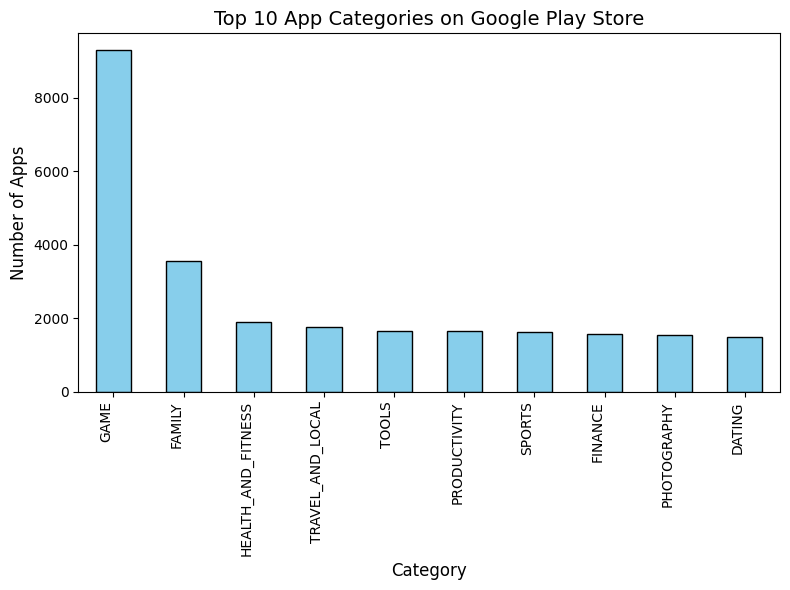

In [103]:
# Chart - 1 Visualization Code

category_counts = merged_df['Category'].value_counts().head(10)

plt.figure(figsize=(8,6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 App Categories on Google Play Store', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I used bar chart because it is the most effective visualization for comparing the number of apps across top 10 categories on play store. It helps easily identify;
1. The highest and lowest app categories in the top 10
2. The relative differences between categories
3. Trends such as which categories of apps are more common on playstore

##### 2. What is/are the insight(s) found from the chart?

1. 'Game' is by far the most dominant category. With over 9,000 apps, the 'Game' category has more apps than all other categories combined in the top 10. This indicates high competition and developer interest in gaming applications.

2. The second major category 'Family' has around 3,500+ apps on playstore. This reflects strong demand for child-friendly and family-oriented apps.

3. Market Imbalance is clearly visisble. There is a huge gap between the top two categories Vs the rest.

4. App ecosystem is diverse but skewed. While the playstore offers variety, developers focus heavily on Gaming or entertainment and Family apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the inights gained from chart can create a strong and positive business impact.
1. Identifying high demand markets - The chart shows Game and Family dominates on playstore. So, this helps business to target the large user base and invest in categories with high potential.

2.  Spotting less competitive opportunities - The chart shows other categories like Health fitness, travel, tools, productivity, sports, finance, photography and dating categories have significantly fewer apps. This creates an opportunity for business to enter in markets where competition is less, easier visiblity and high chances of ranking faster.

3. Business can easiliy decide where to invest, what features to add, Which niche/ category to target and how to differentiate from competitor.

Negative Impact:
High saturation in GAME and FAMILY categories could lead to slow growth, poor visibility, and high competition. Businesses entering these categories may face challenges without strong differentiation.

#### Chart - 2  Proportional distribution of user Sentiments - Pie Chart

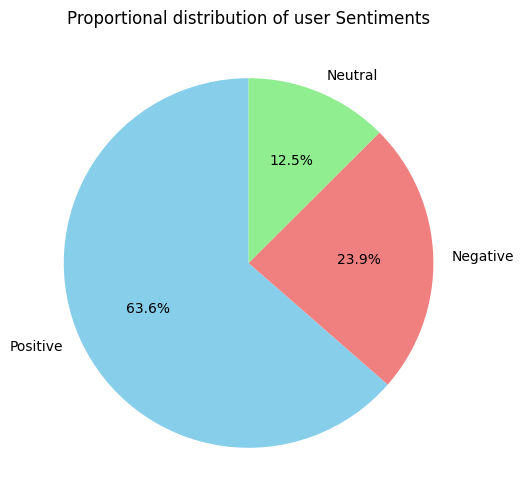

In [104]:
# Chart - 2 Visualization Code

# Checking which sentiments are higher
type_counts = merged_df['Sentiment'].value_counts()

# Creating the pie chart
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90,colors=['skyblue', 'lightcoral', 'lightgreen'])

# autopct -- controls how the percentage values are displayed on the pie chart.
# startangle -- the first slice of the pie will start at 90 degrees
# labels=type_counts.index -- extracting the names for the pie chart slices.

plt.title('Proportional distribution of user Sentiments', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I used pie chart because it is most effective for showing proportional distribution of sentiment categories such as positive, negative and neutral. It easily shows how much each sentiment category contributes to the overall dataset.

##### 2. What is/are the insight(s) found from the chart?

Large portion of users have positive experience with the apps on playstore, while the negative reviews are far fewer than positive ones and a smaller share of neutral reviews.

This indicates overall a robust app ecosystem, reliable user satisfaction, strong potential for busines growth and users retention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Gained insisghts will help creating a positive business impact;
1. High positive sentiment shows user satisfaction and trust.
2. Helps improve strenghts and plan better for product strategies.


Yes, some insights that lead to negative growth such as;
1. A sizable negative sentiment portion indicates issue that can hurt user retention, rating and overall growth if not looked on.

#### Chart - 3  Distribution of Sentiment Polarity - Histogram chart

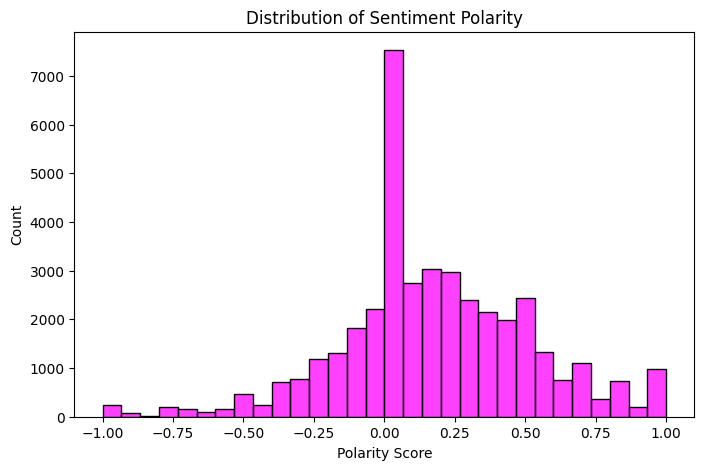

In [105]:
# Chart - 3 Visualization Code
# We are creating a histogram chart to show the distribution of sentiment polarity of user

plt.figure(figsize=(8,5))
sns.histplot(merged_df['Sentiment_Polarity'], bins=30, color = 'magenta')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity Score')  # X axis labelling
plt.ylabel('Count') # Y-axis labelling
plt.show()



##### 1. Why did you pick the specific chart?

I have used histogram because sentiment polarity is a continuos variable, and it is a best way to show how the values are distributed. It clearly revelas whether most reviews are positive, negative or neutral and highlights overall user sentiment patterns.

##### 2. What is/are the insight(s) found from the chart?

1. Most Sentiment polarity values are between 0.0 - 0.5, meaning the majority of reviews are positive to moderately positive.
2. There are fewer negative reviews below 0, indicates that user do not frequently leave strong fecative reviews.
3. Very highly positive reviews (close to 1.0) are less common, suggests users are positive but not enthusiast.
4. Overall, the distribution shows a skew towards positive sentiment, reflects user satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gained insights will help creating positive business impact, As the insights shows the most user reviews have positive sentiment: means user are satisfied, playstore ecosystem is healthy and trusted, the platform can prioritize apps with high positive engagement. So, This can increase user retention, attract new users, and support better decision making, leading to positive business impact.

A Small negative trend is visible, negative polarity value represents unhappy users, or unresolved complaints might often lead to uninstalls, and lower app engagement which can directly contribute to negative growth.

#### Chart - 4  Average Sentiment Polarity by app category - Bar Chart

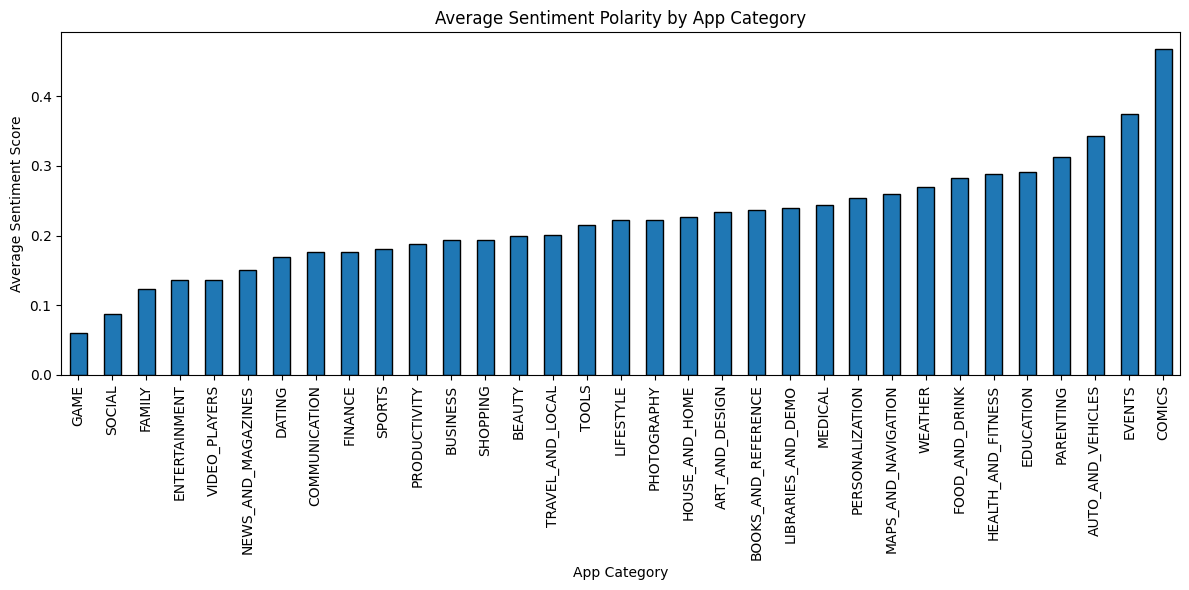

In [106]:
# Chart - 4 Visualization Code

avg_sentiment = merged_df.groupby('Category')['Sentiment_Polarity'].mean().sort_values()

# Ploting bar chart
avg_sentiment.plot(kind='bar', figsize=(12,6), edgecolor='black')

plt.title('Average Sentiment Polarity by App Category')
plt.xlabel('App Category')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose bar chart because i thought it is the most effective way to compare the average sentiment score acorss multiple app categories, this will make visible making trends and gaps.

##### 2. What is/are the insight(s) found from the chart?

1. Categories like Comics, Events, Auto & Vehicles, Parenting, Health & Fitness, and Education have high average sentiment, indicating strong user satisfaction.
2. Game and Social category app shows the lower average sentiment, showing user experiences more issues, frustation or unmet expectations.
3. Most categories have moderately positive sentiment, reflecting overall decent satisfaction, but leaving room for improvement.
4. High sentiment categories may indicate better UX and stable performance, while low sentiment category migh be struggle with bugs, ads, performance issues, or unmet user needs.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insight hepls creating positive impact as they shows which categories have happy users, allowing business to focus investment, marketing, and new features where users are already satisfied. Also shows categories with lower satisfaction which helps companies fix issues and improve user experience to boost retention and satisfaction.

Negative Growth:
Categories like Gaming and Social may lose users because low sentiment reflects bugs, poor experience whic can lead to uninstalls, bad reviews and declining engagement.

#### Chart - 5  Number of Reviews vs Rating - Scatter Plot

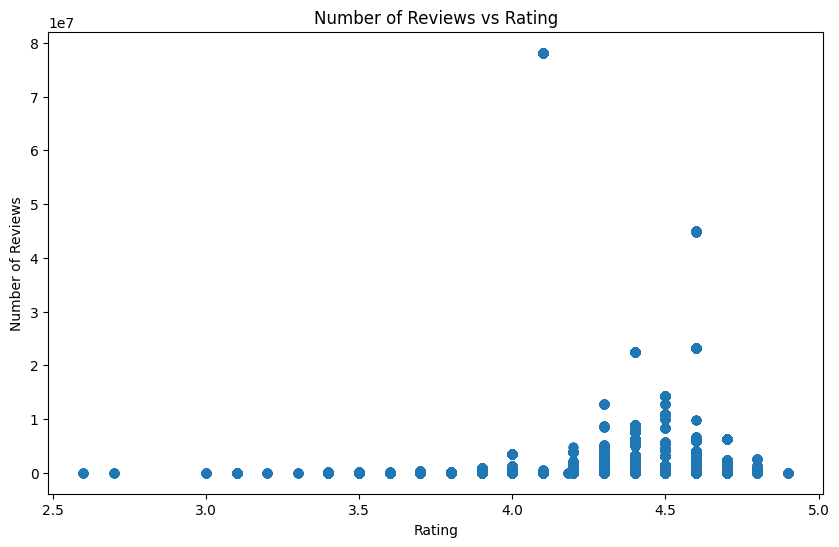

In [107]:
# Chart - 5 visualization code

plt.figure(figsize=(10,6))
plt.scatter(merged_df['Rating'], merged_df['Reviews'])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews vs Rating')
plt.show()


##### 1. Why did you pick the specific chart?

I used scatter plot because i thought it will be the best way to visualize the relationship between two continuous variables - rating and number of reviews. It helped identify trends, relation, data clusters and outliers, all of which are essential to understand user satisfaction and app popularity.

##### 2. What is/are the insight(s) found from the chart?

High rated apps generally receive more reviews, but only a few popular apps dominate the review counts, while many well rated apps stll have very few reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights help business understand that apps with higher rating are tend to attract more user reviews . This means focusing on improving quality, stability and UI/UX, and customer support can directly led to higher ratings and more reviews, increasing installs.

Also, the chart shows many apps with good ratings still have very few reviews; might be they are not reaching more users (poor marketing). This show slow growth, even if the app quality is good.

#### Chart - 6 Box Plot of Ratings by Category

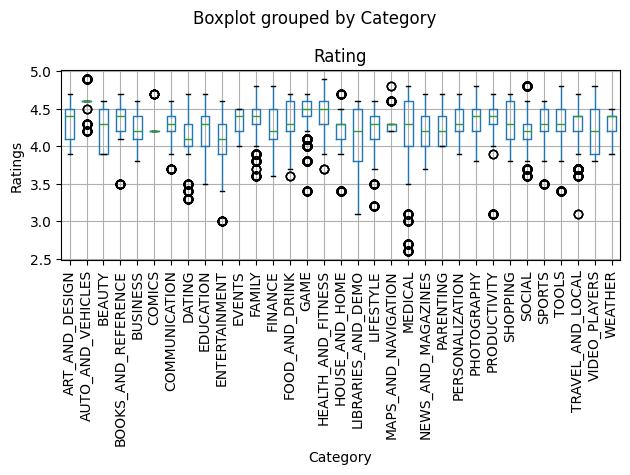

In [108]:
# Chart - 6 visualization code

merged_df.boxplot(column = 'Rating', by = 'Category', rot = 90) # rot = 90 is rotation
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I have picked this Box plot because it is the most efficient and meaningful way to compare ratings across categories, showing complete statistical insight with clarity. Since the goal is to compare how ratings vary between different type of apps, a boxplot is helping here to visualize the Median rating, spread, overall range and outliers for each category in the single chart.

##### 2. What is/are the insight(s) found from the chart?

Box plot reaveals that most of the play store categories maintain overall high user ratings (median 4.2 - 4.5). Categories such as Art and Design, Personalization, and Photography shows consistently high performance with minimal variation. Also, Categories like Lifestyle, Health & fitness, and tools exhibit greater variability and contain several poorly rated outlier apps, indicating inconsistent app quality. Several categories also display very low outliers, suggesting the presence of apps with performace issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can positively impact business decisions by highlighting high-performing categories worth investing in and identifying low-performing categories where improved quality can capture unmet demand.

Howeve, there are some insights that point to negative growth: categories with high rating variability and multiple low rated outliers indicate inconsistent quality and poor user experience, which may harm brand reputation and reduce user trust.

#### Chart - 7 Average rating by App Type (Free Vs Paid) - Bar Plot

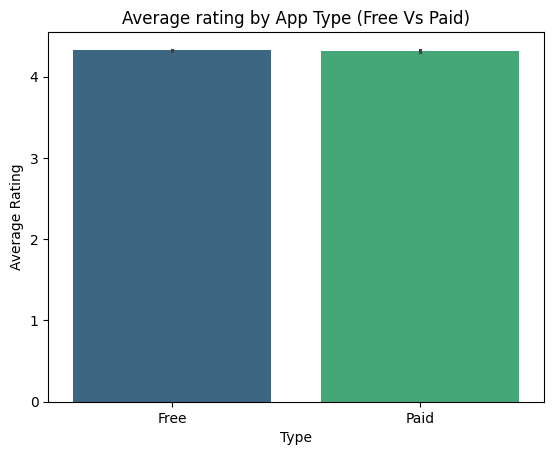

In [109]:
# Chart - 7 visualization code

sns.barplot(x = 'Type', y = 'Rating', data = merged_df, estimator= 'mean', palette = 'viridis', hue = 'Type')

plt.title('Average rating by App Type (Free Vs Paid)')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.show()

##### 1. Why did you pick the specific chart?

I have used here a barplot because it clearly visualizes the average ratings of Free Vs Paid apps, allowing an intuitive comparison of mean values between the two app types.

##### 2. What is/are the insight(s) found from the chart?

The above chart highlights that both free and paid apps recieve alsmost similar ratings, with free apps slightly outperforming paid apps. This indicates that app price does not influence user satisfaction. Free apss appear to deliver competitive user experiences, and paid apps do not show an significant rating advantage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights from above chart helps create positive business impact by showing that free apps achieve high user satisfaction , making them strong candidates for ad-based models. Paid apps must clearly deliver premium value since they do not outperform free apps in ratings.

However, there are some highlight of negative growth: if paid apps do not justify their cost throug premium quality, user may shift towards free alternatives, reducing revenues. Also, free apps increase market competition, making it harder for paid apps to stand out, as both type get almost equal ratings.

#### Chart - 8 Polarity Vs Subjectivity - Scatter Plot

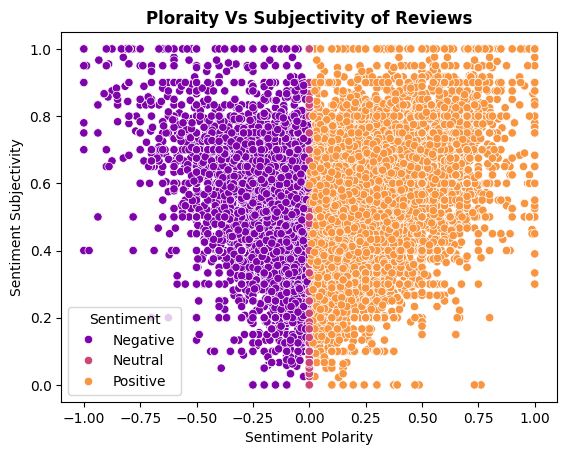

In [110]:
# Chart - 8 visualization code

sns.scatterplot(data = merged_df, x = 'Sentiment_Polarity', y = 'Sentiment_Subjectivity', hue = 'Sentiment', palette = 'plasma')

# hue = sentiment, colours by positive/ neutral/ negative

plt.title('Ploraity Vs Subjectivity of Reviews', weight = 'bold')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.legend(title = 'Sentiment')
plt.show()

##### 1. Why did you pick the specific chart?

We have used a Scatter plot here because we have to show the relationship between sentiment polarity and sentiment subjectivity across thousands of individual reviews, allowing clear identification of clustering patternsfor positive, neutral and negative sentiments.

##### 2. What is/are the insight(s) found from the chart?

1. The above chart highlights a clear seperation of Positive, Neutral and negative reviews based on polarity, confirming effective sentiment classification.
2. Most reviews are highly subjective, indicating that user feedback is largely personal. Neutral review cluster near zera polarity as expected.
3. Positive reviews appear to be slightly more subjective, while negative reviews show a mix of subjective and objective.
4. No strong corelation exists between subjectivity and polarity, and dataset contain more positive reveiws overall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Insight founds in the above chart supports positive business impact by helping companies to understand the customer emotions, identify pain points, and leverage positive sentiment to improve user engagement and product quality.

However there are some insight that may lead to negative growth like; cluster of negative subjective reviews indicate dissatisfaction that can harm app and brand reputation. reduce ranking, and discourage new downloads. Highly subjective negative feedback is damaging as it spreads quickly and influence user perception.

#### Chart - 9  Installs Vs Rating - Scatter Plot

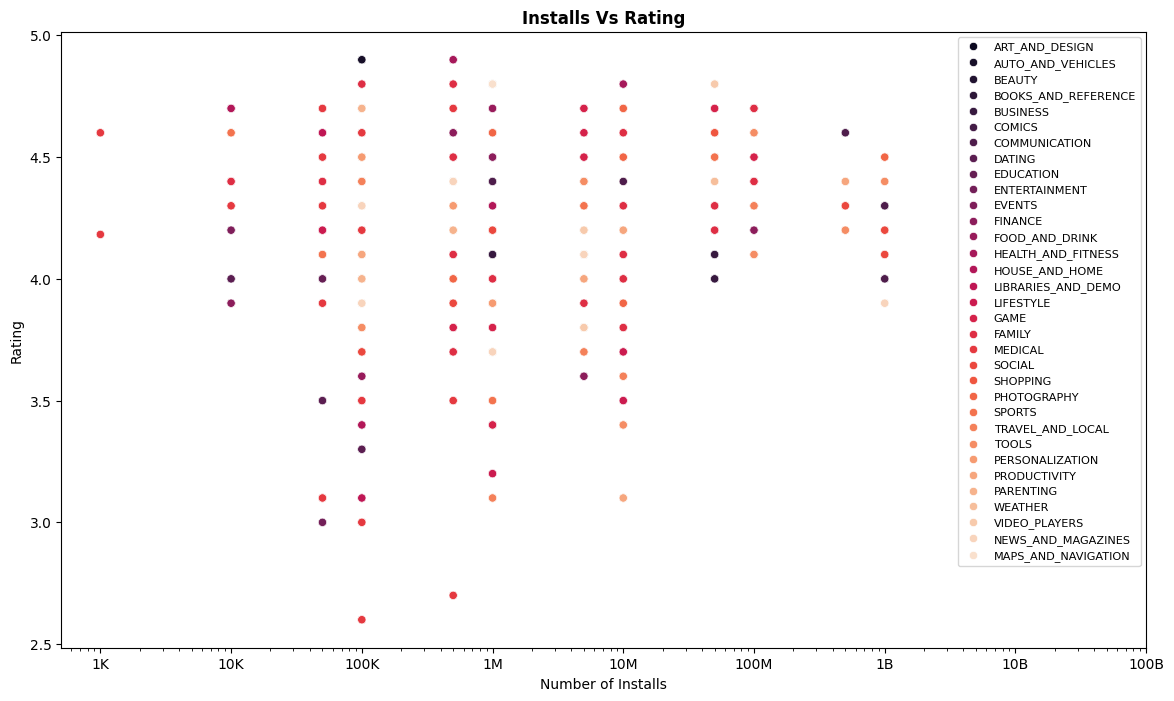

In [111]:
# Chart - 9 visualization code

plt.figure(figsize = (14, 8))
sns.scatterplot(data = merged_df, x = 'Installs', y = 'Rating', hue = 'Category', palette = 'rocket')  # Legend = False because it is taking so much space, hence we opt to not show

plt.xscale('log') # It spreads big numbers evenly for clear visualization

plt.title('Installs Vs Rating', weight = 'bold')
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.legend(loc = 'upper right', fontsize = 8.1)  # loc to position the legends section to upper right of the chart

plt.xticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11], ['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B', '100B'])  # to change the x-axis labels
plt.show()

##### 1. Why did you pick the specific chart?

I used scatterplot here to show the relationship between number of installs and Rating because i thought it is the best chart for showing relation between two numeric variable, helps to identify whether popularity impacts quality, captures categorywise variation via colours, log scale helps manage huge variation/ numbers in installs variable.

##### 2. What is/are the insight(s) found from the chart?

1. There is no strong correlation between Installs and Ratings - meaning higher installs do not guarantee a higher rating or vice versa
2. Most apps maintain ratings between 4.0 and 4.6, regardless of installs.
3. Apps with very low ratings, rarely achieve high installs, indicating ppor ratings limit growth.
4. few categories dominate high installs, showing that popularity depends more on category demand than rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights gained help businesses understand that high installs does not automatically mean high ratings, and user satisfaction must be maintained.
Comapnies can use this analysis to: focus on improving user experience, identify app category with hig install potentials, monitor ratings closely, because good rating support long term install growths.

Also, one negative growth insight is: apps with poor rating rarely recieves high installs because low rating reduces visibility on play store, poor reviews impact user trust and discourage new users from downloading.

#### Chart - 10  Count of Ratings per Content Rating - Count Plot

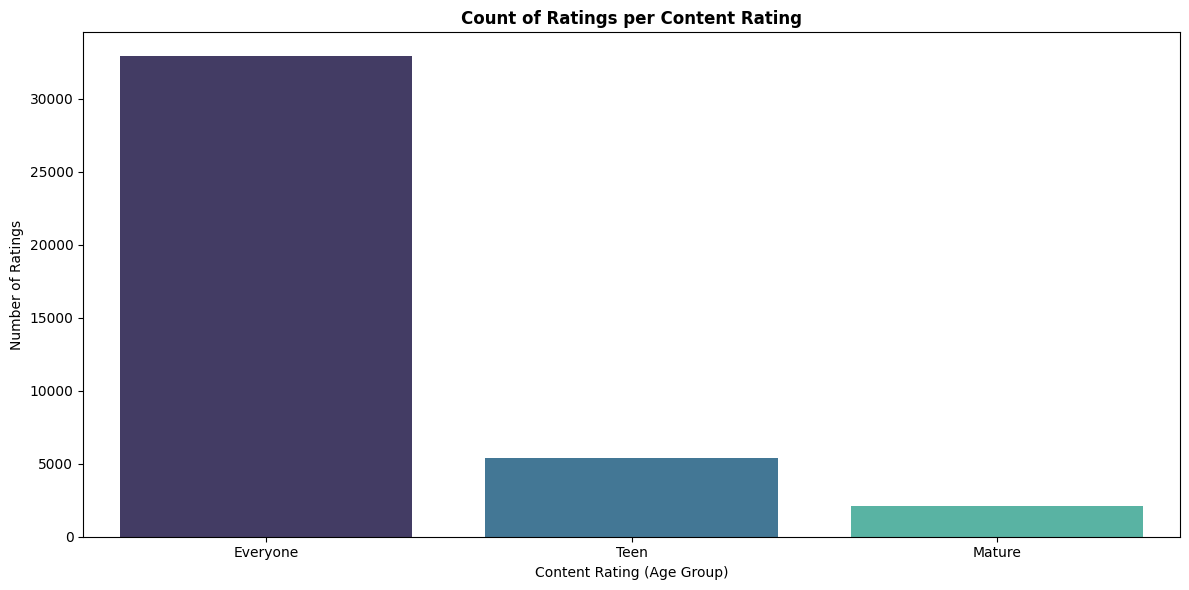

In [112]:
# Chart - 10 visualization code

plt.figure(figsize = (12,6))
sns.countplot(data = merged_df, x = 'Content Rating', palette = 'mako', hue = 'Content Rating')
plt.title('Count of Ratings per Content Rating', weight = 'bold')
plt.xlabel('Content Rating (Age Group)')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I used Count plot because since the 'Content Rating' is a categorial variable, a count plot is the simplest and most effective way to compare the frequesncy of each category and understand the distribution in the dataset.

##### 2. What is/are the insight(s) found from the chart?

1. 'Everyone' has the highest number of ratings by a large margin, showing that most apps are designed for a general audience.
2. 'Teen' rated apps have significantly fewer ratings compared to 'Everyone', indicating a smaller user base or fewer apps in category.
3. 'Mature' rated apps have the least number of ratings, showing they are the least common or least interacted - with category.
4. Overall - The dataset is heavily dominated by 'Everyone' content, with 'Teen' and 'Mature' categories being much smaller. This indicates a strong imbalance in content rating distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help businesses target the right audience and allocate resources more effectively. Since 'Everyone' rated apps dominate the market, companies can focus on creating universally accessible apps to attact a larger user base and maximize downloads this will help in better market targetting, high reach and revenue.

However, there is a sign of negative growth because the chart shows Teen and Mature categories have very low counts, which indicates lower demand or restrictions. if business invests, it might reach a smaller audience, causing slow growth and limited engagement.

#### Chart - 11 Average Rating trend over years - Line Plot

In [113]:
# Extracting year from the last updated variable to check the trend over time and making it a column

merged_df['Year'] = merged_df['Last Updated'].dt.year

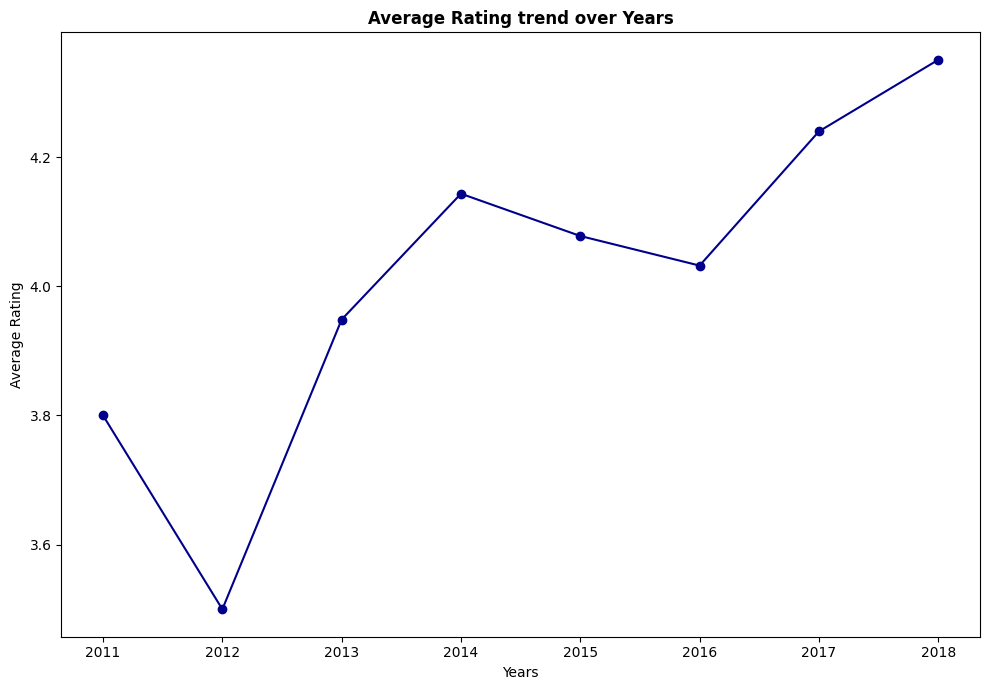

In [114]:
# Chart - 11 visualization code

# Plot size
plt.figure(figsize = (10,7))

# Plotting Line chart
merged_df.groupby('Year')['Rating'].mean().plot(marker = 'o', color = 'darkblue')
plt.title('Average Rating trend over Years', weight = 'bold')
plt.xlabel('Years')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I used the Line chart in this visualization because it visually highlight how user satisfaction has evolved over years, highlighting patterns and trends that wouldnt be as clear in the other chart types.

##### 2. What is/are the insight(s) found from the chart?

1. The overall trend shows a steady increase in average app ratings from 2012 - 2018, indicating that apps on play store are becoming more refined, stable and user friendly.
2. A noticeable dip in 2012 signals lower app quality or poor user experience that year
3. From 2013 to 2014, there is a strong upward jump in ratings, indicating developers improved: app updates, stability, feature quality.
4. Ratings slightly decline during the period 2015 - 2016 suggests moderate drop in quality.
5. By 2018, the average rating reaches its highest point, showing peak user satisfaction and strongest performance by apps on play store.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the trend shows the positive business impact. The upward movement in the rating from 2013 to 2018 shows apps are improving in quality - developers are releasing updates, bug fixes and more stable features. Opportunity to invest in enhacement focused strategies - since ratings increased companies can justify investing in : UI/ UX enhacement, performance optimization, feature upgrades.
Oberall trend help business make decisions based on actual user satisfaction data, which leads to better product planning and competitive advantage.

There is an insight that may lead to negative growth the drop in 2012 highlights a period of poor app quality and user dissatisfaction, which could have negatively impacted download, retention and user trust.

#### Chart - 12 Average Reviews Growth Over Years - line Plot

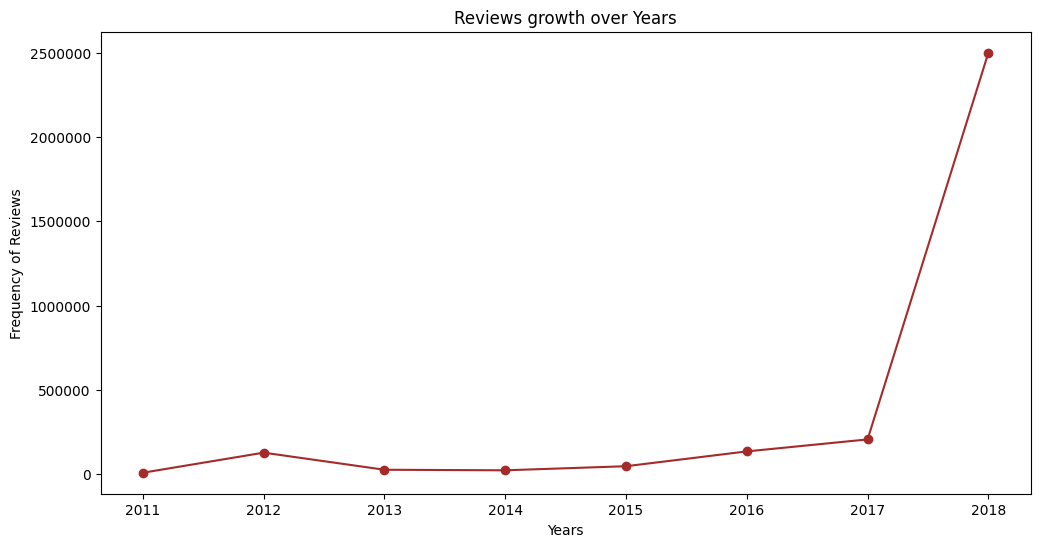

In [115]:
# Chart - 12 visualization code

plt.figure(figsize = (12,6))

yearly_review = merged_df.groupby('Year')['Reviews'].mean().plot(marker = 'o', color = 'brown')
plt.title('Reviews growth over Years')
plt.xlabel('Years')

plt.ylabel('Frequency of Reviews')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


##### 1. Why did you pick the specific chart?

I chose line chart over other chart for this insight because line chart is best for showing trend over the time/ years, highlights growth patterns, and give smooth comparison between years.

##### 2. What is/are the insight(s) found from the chart?

1. Steady and low review activity is seen from 2011 - 2015, the no. of reviews remained minimal with only slight fluctuations.
2. Noticeable growth in reviews began from 2016 showing increaseing engagement and app usage.
3. A massive spike in 2018 indicating either rapis user base expansion, aggressive marketing or more apps being launched that year.
4. Overall trend is strongly upward, showing significant growth in user interaction over years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yesm there is a positive impact on business because insight clearly shows user engagement has grown significantly over years, especially in 2018: this will help business to take data driven decision like: understanding user engagement patterns supports better forecasting and resource planning. Identifying growth trends helps in planning better future product launching, market expansion.
Overall can help in strategic improvements and enhancing user centric decisions.

Insights that led to Negative growth: as we can see in chart between 2012 to 2014, the slight dip shows lower app usage or visibility, lack of major updates or features. Although dip is small, but shows inconsistent growth patterns can occur if apps are not actively improvedor marketed.

#### Chart - 13 App Size Distribution by Top 5 Categories - Violin Plot

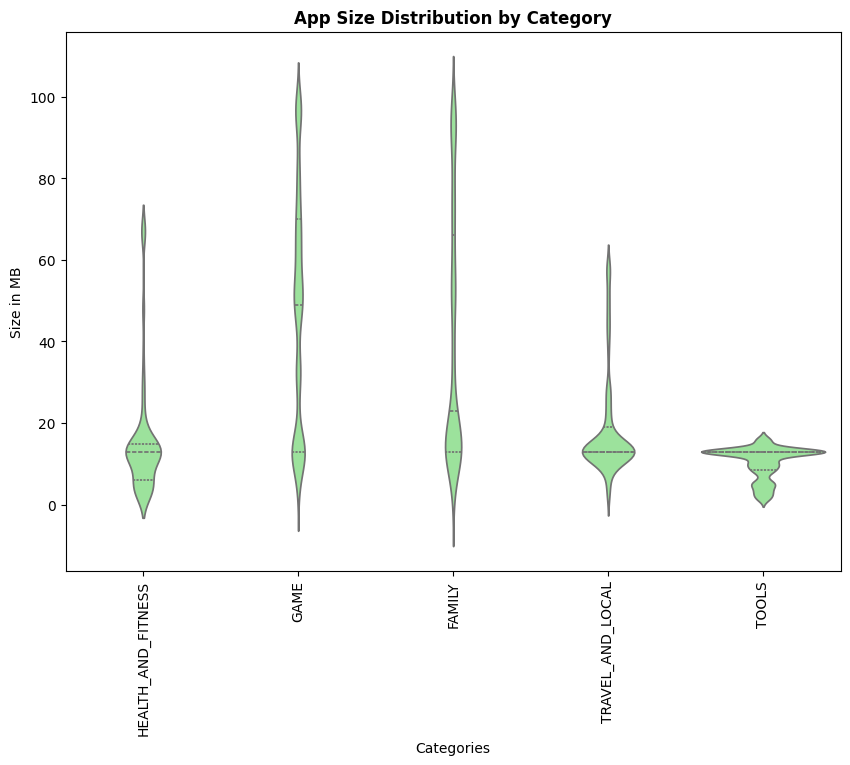

In [116]:
# Chart - 13 visualization code
plt.figure(figsize = (10,7))

top_5_categories = merged_df['Category'].value_counts().head(5)

top5_df = merged_df[merged_df['Category'].isin(top_5_categories.index)]

sns.violinplot(data=top5_df, x='Category', y='Size', inner='quartile', color = 'lightgreen')
# inner = quartile is an arguement to show 25th percentile, median, 75th percentile of dataset via line in violin plot

plt.xticks(rotation = 90)
plt.title('App Size Distribution by Category', weight = 'bold')
plt.xlabel('Categories')
plt.ylabel('Size in MB')
plt.show()

##### 1. Why did you pick the specific chart?

For insights I have used Violin plot because it allows comparison of the distribution and density of app sizes across categories, not just summary statistics. Since my dataset is large and the size values vary significantly by category, the violin plot clearly shows the spread, skewness, concentration, and quartiles for each category, giving deeper insights than box plot.

##### 2. What is/are the insight(s) found from the chart?

1. Game and Family Category apps have the largest size variation, ranging up to 100 MB, while Tools category are consistently small.
2. Health & Fitness and Travel & Local apps fall in moderate bu stable size range.
3. The chart shows clear category wise differences in median size and distribbution spread, userful for understanding the storange requirements by app type.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes - these insights can make a positive business impcat especially for developers, product teams and business strategists as below:
1. Better storage optimization decisions - Smaller app, high install rates, low uninstall rates.
2. Better prediction of user behaviour - Large app sizes ofter correlate with lower download completion rate, higher uninstall rate, higher battery/ RAM usage complaints.

Also there are insights that show negative growth like -
1. Game and Family Categories risks losing users due to large sizes of apps because users with low storage or slow internet avoids large apps.
2. Categories with very Small size like Tools may lack innovation and new features for user satisfaction.

#### Chart - 14 - Correlation Heatmap

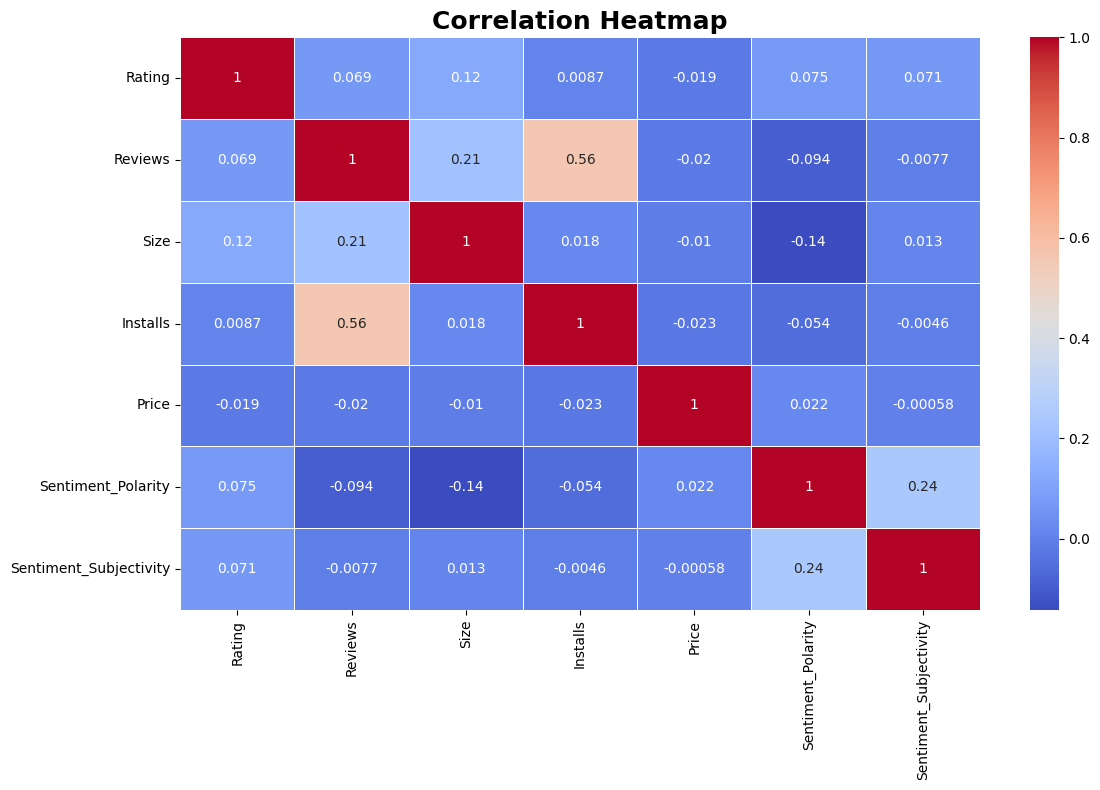

In [117]:
# Correlation Heatmap visualization code

# Using only numerical variables of our dataset, because correlation requires numerical values

# selecting only numeric columns
numeric_variables = merged_df[['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Sentiment_Polarity', 'Sentiment_Subjectivity']]

# Correlation matric creation

corr = numeric_variables.corr()

# plotting heatmap now

plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidths = 0.5) # annot = true --> Shows correlation values inside each cell
plt.title('Correlation Heatmap', weight = 'bold', fontsize = 18)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I used correlation heatmap visualization because it is best for the dataset which contains numeric variables, heatmap is best to visualize/ analyze all pairwise at once. Also, it highlights the strength and correlations through color gradients making it easier to find the patterns.

##### 2. What is/are the insight(s) found from the chart?

1. The strongest and meaningful correlation is between Reviews and Installs (0.56), highlighting apps with more installs naturally get more reviews.
2. All other correlations are weak showing that price, rating, size and sentiment are independent and do not strongly influence the installs or each other.
3. App Size and Price do not do not impact user engagement or satisfaction.

#### Chart - 15 - Pair Plot

<Figure size 1000x600 with 0 Axes>

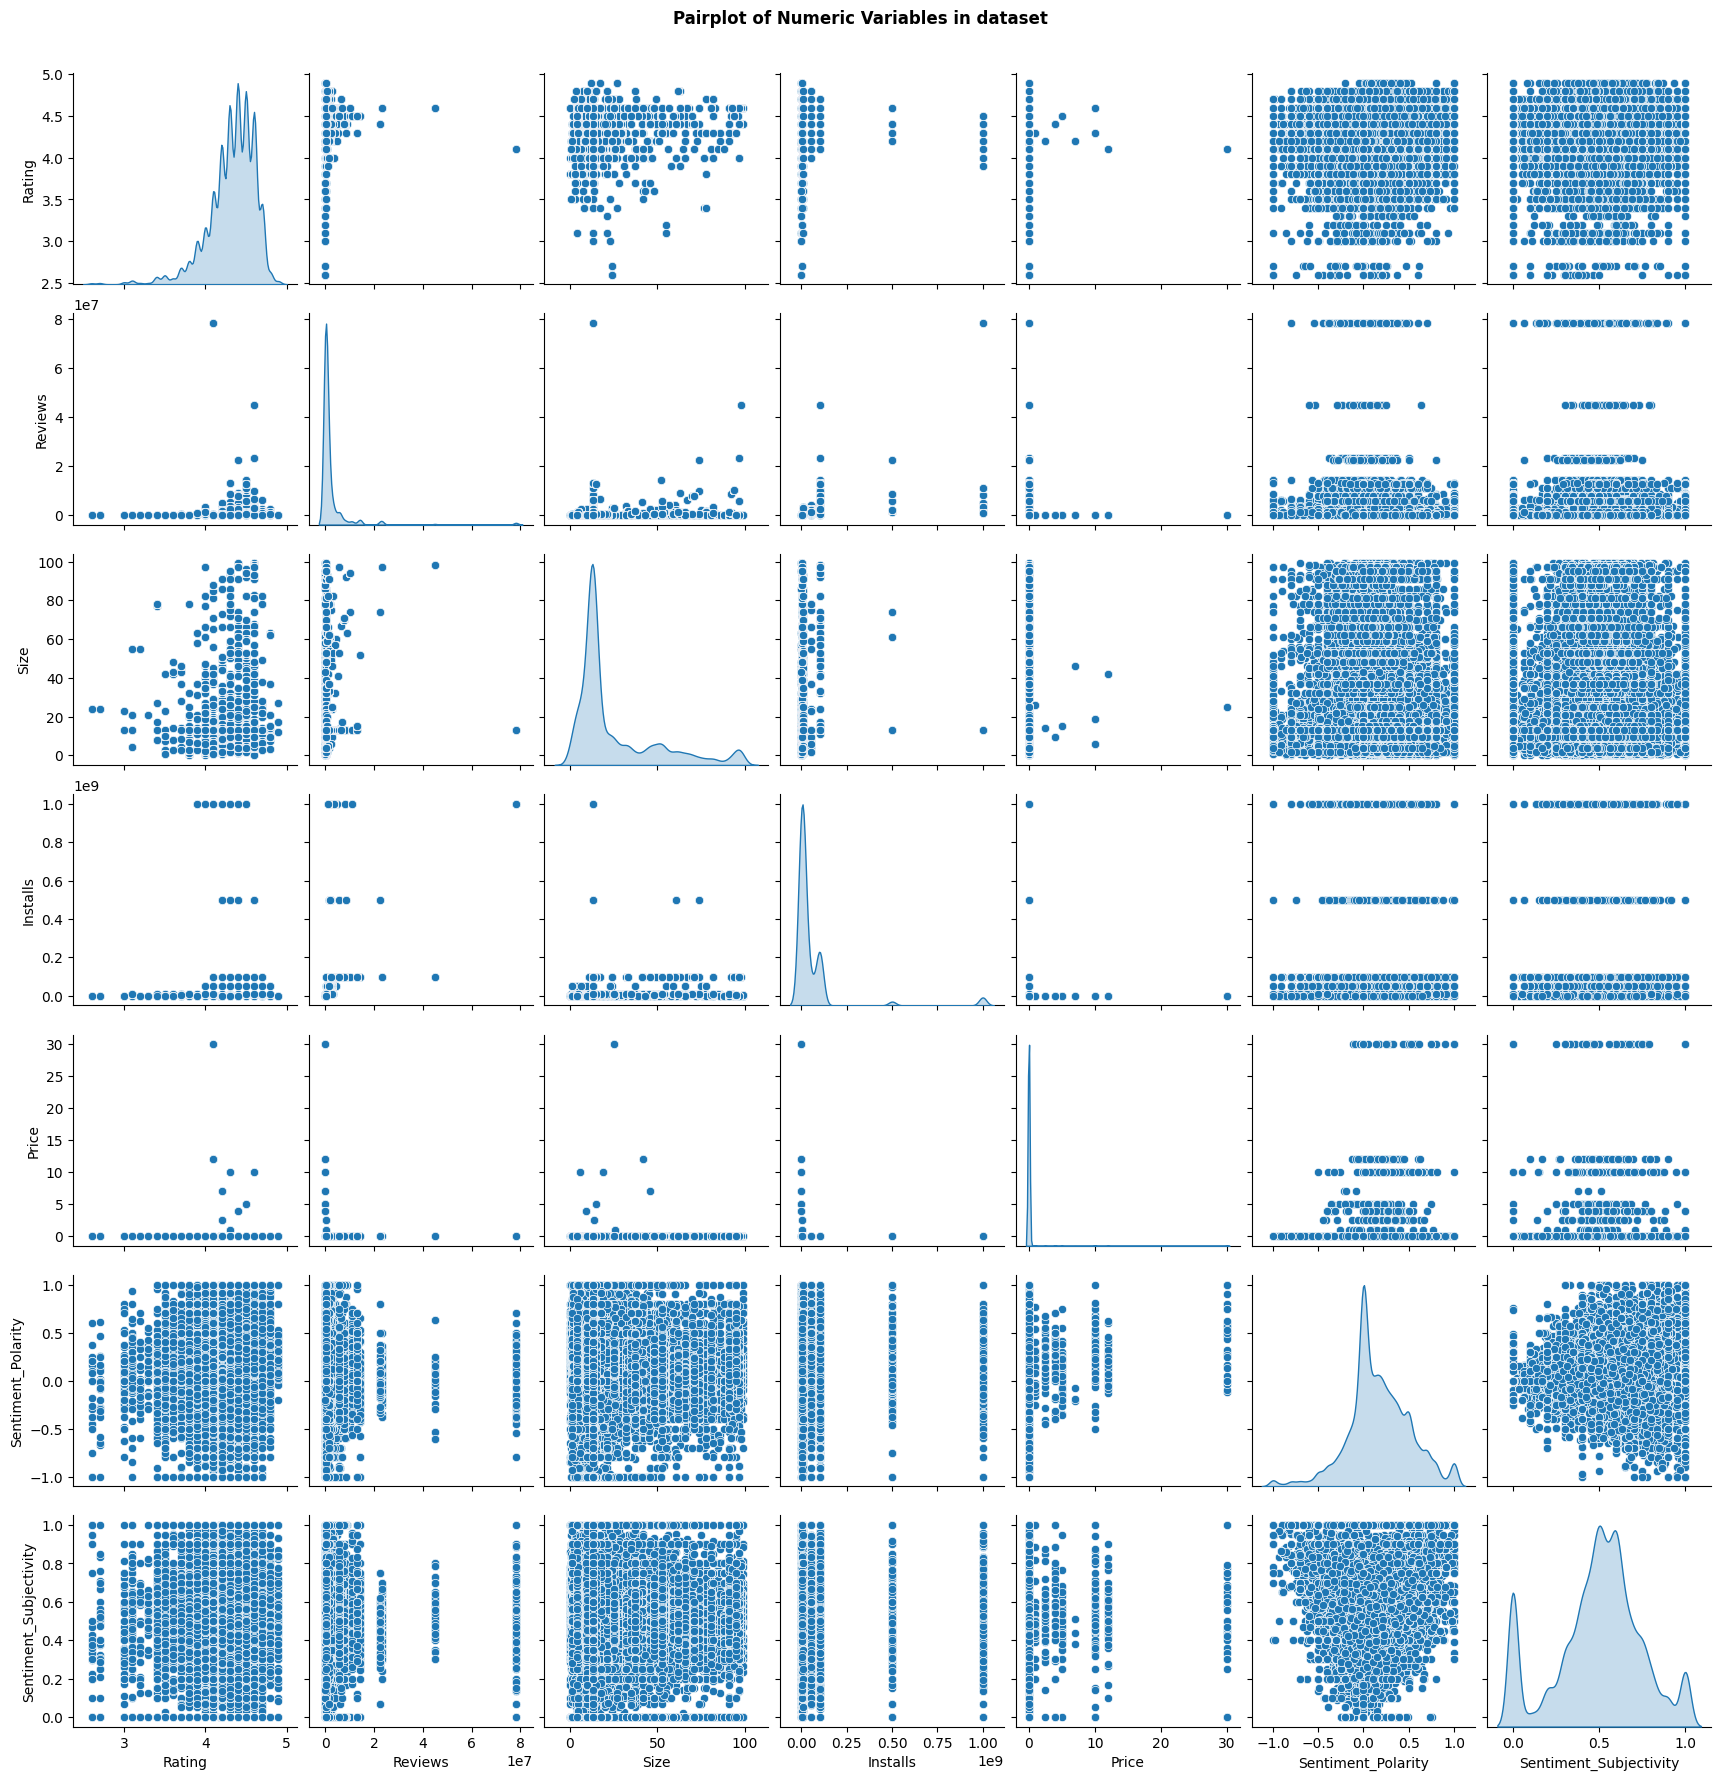

In [118]:
# Pair Plot visualization code

# same we will use numeric columns of our dataset.
# selecting only numeric columns
numeric_variables = merged_df[['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Sentiment_Polarity', 'Sentiment_Subjectivity']]

# plotting the pair plot
plt.figure(figsize = (10, 6))
sns.pairplot(numeric_variables, diag_kind = 'kde')  # used diag_kind --> smooth density plot on diagonals,
plt.suptitle('Pairplot of Numeric Variables in dataset',y = 1.02, weight = 'bold') # Supertitle for chart
plt.show()


##### 1. Why did you pick the specific chart?

I chose pair plot to use in this visualization because it quickly and clearly shows relationship between all numeric variables , helps detect patterns and correlation , and provides a clear overview of distribution for effective exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

1. Just like we seen insight in heatmap, here in pairplot also, Reviews and Installs have a strong correlation/ positive relationship, apps with more installs generally have more reviews.
2. Rating shows no strong correlation with Reviews, installs, price and Size.
3. Sentiment Polarity and Sentiment Subjectivity show no clear relationship with oth variables.
4. Price is mostly 0, meaning most of the apps are free.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on exploratory data analysis, below are the suggestion for client to achieve business objective:

1. Improve user experience in low sentiment categories like game and social, this shows low average sentiment, means user are facing issues. Suggestion for client - prioritize bug fixing, performance optimization or remove ads if possible, also conduct an survey of user feedback to identify pain points.
2. Leverage high sentiment categories like Comics, events, auto & vehicles, parenting for more growth because this show strong sentiment. Suggestion for client - invest more in this categories, they promise user satisfaction and performace. launch new features or apps in this high trust areas.
3. Focus on App quality, not price because free and paid apps show no rating difference, and paid apps do not guarantee better performance. Suggestion for client - Improve quality, feature value, stability and design to justify paid app price. For free apps maintain quality to ensure retention.
4. Improve rating and reviews strategy, because ratings do not correlate strongly with Installs but poor ratings prevent app scaling. Suggestions for client - Encourage satisfied users to leave reviews, implement in app prompts.
5. Optimize app size based on Category expectation, because apps must remain lightweight in order to be accessed by everyone. Suggestion for client - reduce unnecessary asset to improve download speed. Keep app size optimised.
6. Capitalize on the growing trend post 2016 because strong growth rising from 2016 shows rising market opportunity. Suggestion for client - Release app updates regularly, improve UI and performance to match user expectations.
7. Focus on features that drive installs not price and ratings because installs strongly correlate with reviews not price and ratings. Suggestion for client - improve visibility through marketing and app store optimization. Promote feedback that loop and convert installs into reviews.
8. Prioritize 'Everyone' content Rating app as it dominates and most engaging. Suggestion for client - Build or invest more in genral audience apps for growth and profits, Ensure family safe content policies.

# **Conclusion**

The Exploratory Data Analysis of the Playstore concludes that the play store is heavily dominated by Game and Family apps, but overall user sentiment remains strongly positive. While most of the categories maintain high ratings, several of them show inconsitent quality with noticeable low-rated outliers. Sentiment Analysis indicates that the negative feedback is low but concentrated in high traffic categories like Game and Social, suggesting unment user expectations. App success is strongly linked to installs and reviews by user and not on price and size of the app. Engagement has grown sharply over the years, reflecting expansion of overall app ecosystem. Overall the platform is performing weel but still there is a scope of improvement in app stability, reduce performance issues, and enhance user experience in key categories.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***